# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

df = pd.read_csv('/Users/gretchenwang/GitHub/assignment-5/data/tidal_wetland_estuaries.csv')
df.head()


,name,coast,estu_latitude,estu_longintude,estu_dep,estu_perim,land_area,land_latitude,land_longitude,population,...,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
0,Florida Bay,GULF,25.039940,-80.731770,0.62000,614000.000,9.048954e+08,25.187310,-80.727540,3421,...,36.2,24.4,0.0,26.50,0.07,0.810,1.000000e+09,1251.831801,24.594719,0.087
1,South Ten Thousand Islands,GULF,25.311330,-81.057020,0.63000,597000.000,3.069216e+09,25.440250,-80.791070,235792,...,36.1,24.6,0.0,26.40,0.08,0.780,3.000000e+08,1355.907147,24.320596,0.000
2,North Ten Thousand Islands,GULF,25.724280,-81.377640,0.73000,906000.000,4.921106e+09,25.982520,-81.273680,9268,...,36.0,24.1,0.0,26.30,0.09,0.790,6.000000e+08,1416.239789,23.873671,0.084
3,Rookery Bay,GULF,25.998750,-81.756010,0.50000,148000.000,3.304589e+08,26.042920,-81.677710,14858,...,36.0,23.9,0.0,26.10,0.08,0.670,4.000000e+07,1432.519416,23.510000,0.086
4,Charlotte Harbor,GULF,26.754031,-82.103018,1.65938,507261.119,1.169284e+10,27.167615,-81.772154,597644,...,35.9,23.2,1.0,25.65,0.10,0.545,7.000000e+08,1320.275690,22.869199,0.073


In [2]:
df = df.replace(-9999., np.NaN)
df.head()

,name,coast,estu_latitude,estu_longintude,estu_dep,estu_perim,land_area,land_latitude,land_longitude,population,...,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
0,Florida Bay,GULF,25.039940,-80.731770,0.62000,614000.000,9.048954e+08,25.187310,-80.727540,3421.0,...,36.2,24.4,0.0,26.50,0.07,0.810,1.000000e+09,1251.831801,24.594719,0.087
1,South Ten Thousand Islands,GULF,25.311330,-81.057020,0.63000,597000.000,3.069216e+09,25.440250,-80.791070,235792.0,...,36.1,24.6,0.0,26.40,0.08,0.780,3.000000e+08,1355.907147,24.320596,0.000
2,North Ten Thousand Islands,GULF,25.724280,-81.377640,0.73000,906000.000,4.921106e+09,25.982520,-81.273680,9268.0,...,36.0,24.1,0.0,26.30,0.09,0.790,6.000000e+08,1416.239789,23.873671,0.084
3,Rookery Bay,GULF,25.998750,-81.756010,0.50000,148000.000,3.304589e+08,26.042920,-81.677710,14858.0,...,36.0,23.9,0.0,26.10,0.08,0.670,4.000000e+07,1432.519416,23.510000,0.086
4,Charlotte Harbor,GULF,26.754031,-82.103018,1.65938,507261.119,1.169284e+10,27.167615,-81.772154,597644.0,...,35.9,23.2,1.0,25.65,0.10,0.545,7.000000e+08,1320.275690,22.869199,0.073


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [3]:
# part 1 and 2 
df_east = df.loc[df['coast']=='EAST',:]
df_west = df.loc[df['coast']=='WEST',:]
stats.ttest_ind(df_east['soc_density'], df_west['soc_density'], alternative='greater')
# With a p-val that is significantly less than any regular significance level, the alternative hypothesis is true and the soil organic carbon density is large in the east coast than the west




Ttest_indResult(statistic=8.45031778669312, pvalue=5.765284478012742e-13)

I used a 2-sample t-test because the question asks that I compare the true means of two groups of data, not just compare the mean of one set of data to a fixed value

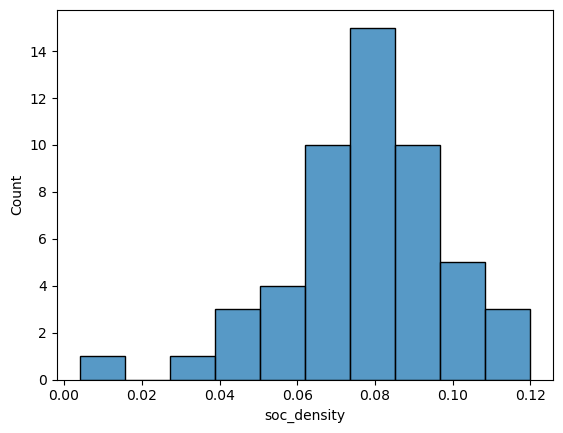

In [4]:
# part 3 
sns.histplot(data=df_east, x='soc_density')
plt.show()

# pretty normal save for an outlier at around 0.01. It has a bell-shaped curve besides the point at 0.1, indicating normality

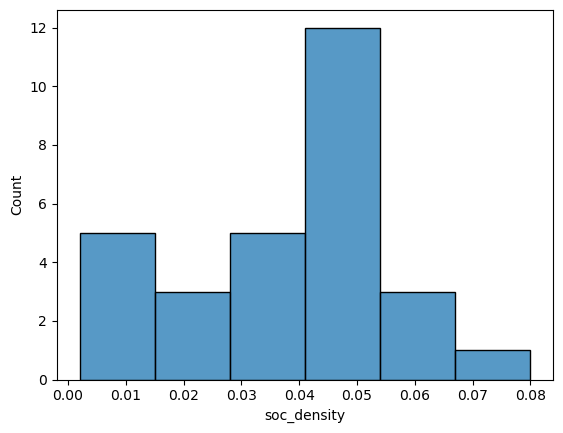

In [5]:
sns.histplot(data=df_west, x='soc_density')
plt.show()

# less normal but you could still make a case for it. It has something of a bell-shaped curve, indicating general normality.

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [6]:
df.head()

,name,coast,estu_latitude,estu_longintude,estu_dep,estu_perim,land_area,land_latitude,land_longitude,population,...,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
0,Florida Bay,GULF,25.039940,-80.731770,0.62000,614000.000,9.048954e+08,25.187310,-80.727540,3421.0,...,36.2,24.4,0.0,26.50,0.07,0.810,1.000000e+09,1251.831801,24.594719,0.087
1,South Ten Thousand Islands,GULF,25.311330,-81.057020,0.63000,597000.000,3.069216e+09,25.440250,-80.791070,235792.0,...,36.1,24.6,0.0,26.40,0.08,0.780,3.000000e+08,1355.907147,24.320596,0.000
2,North Ten Thousand Islands,GULF,25.724280,-81.377640,0.73000,906000.000,4.921106e+09,25.982520,-81.273680,9268.0,...,36.0,24.1,0.0,26.30,0.09,0.790,6.000000e+08,1416.239789,23.873671,0.084
3,Rookery Bay,GULF,25.998750,-81.756010,0.50000,148000.000,3.304589e+08,26.042920,-81.677710,14858.0,...,36.0,23.9,0.0,26.10,0.08,0.670,4.000000e+07,1432.519416,23.510000,0.086
4,Charlotte Harbor,GULF,26.754031,-82.103018,1.65938,507261.119,1.169284e+10,27.167615,-81.772154,597644.0,...,35.9,23.2,1.0,25.65,0.10,0.545,7.000000e+08,1320.275690,22.869199,0.073


In [7]:
from utils import Linear_Reg_Diagnostic # do not change!

In [8]:
# part 1 
model = smf.ols(formula="ocean_salinity_mean ~ air_temp_mean", data=df).fit()
model.predict(
    {'air_temp_mean':[50,24,15,28]})

0    41.882077
1    35.509074
2    33.303034
3    36.489536
dtype: float64

In [9]:
# part 2 
model1 = smf.ols(formula="ocean_salinity_mean ~ ocean_sst_mean + mean_precip", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.805
Model:                             OLS   Adj. R-squared:                  0.801
Method:                  Least Squares   F-statistic:                     229.0
Date:                 Mon, 01 May 2023   Prob (F-statistic):           4.07e-40
Time:                         21:53:21   Log-Likelihood:                -124.20
No. Observations:                  114   AIC:                             254.4
Df Residuals:                      111   BIC:                             262.6
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.0768      0.296    105.078      0.000      30.491      31.663
ocean_sst_mean     0.2119      0.011     19.530      0.000       0.190       0.233
mean_precip       -0.0010      0.000     -6.913      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        7.958   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.372
Skew:                          -0.661   Prob(JB):                       0.0152
Kurtosis:                       2.874   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
diag = Linear_Reg_Diagnostic(model1)
diag.vif_table()

         Features  VIF Factor
1  ocean_sst_mean        1.01
2     mean_precip        1.01
0       Intercept       18.76


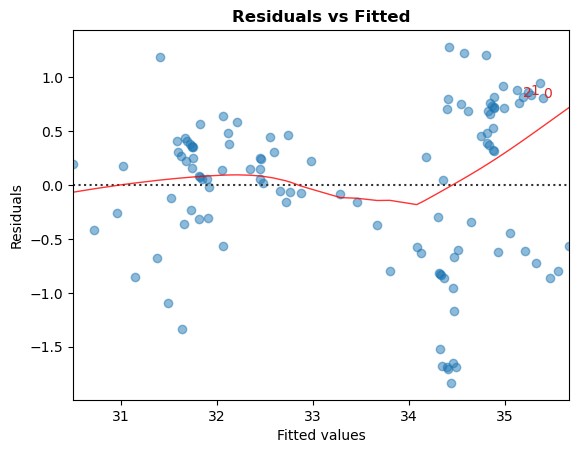

In [11]:
# Part 3 
diag.residual_plot();

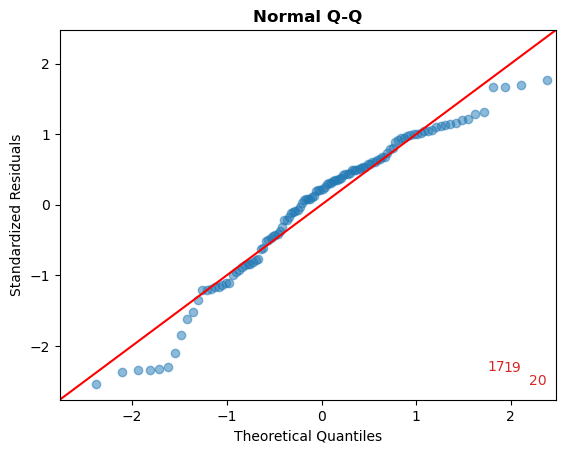

In [12]:
diag.qq_plot();

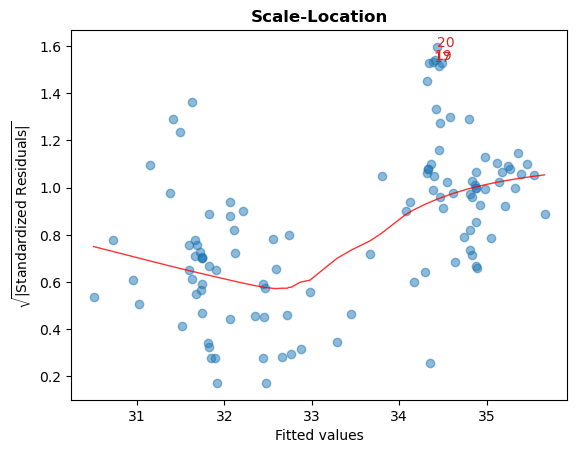

In [13]:
diag.scale_location_plot();

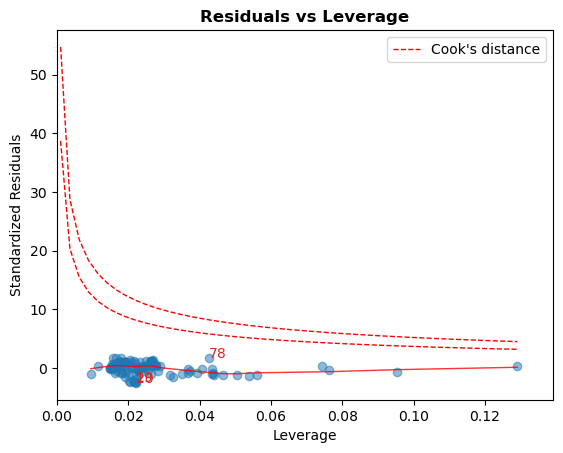

In [14]:
diag.leverage_plot();

The model doesn't look that normal, as the residual vs. fitted plot shows an uptick in the red line on the right of the graph, the qq plot shows a bit of a curve around the line rather than along it, and the scale-location plot shows a very curved line. However, it  seems to be acceptable to still conclude it as normal. I also used a leverage plot to test if there were any outliers that were causing the strange-looking results, but it doesn't seem like there are any.

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [15]:
coal = pd.read_csv("/Users/gretchenwang/GitHub/assignment-5/data/coal-production.csv")
coal.head()

,year,electricity_prod
0,1960,45.904345
1,1961,45.730794
2,1962,46.411172
3,1963,46.599523
4,1964,46.102588


In [16]:
# part 1 
coal['year'] = pd.to_datetime(coal['year'], format='%Y')
coal = coal.set_index('year').sort_index()
coal.head()

,electricity_prod
year,
1960-01-01,45.904345
1961-01-01,45.730794
1962-01-01,46.411172
1963-01-01,46.599523
1964-01-01,46.102588


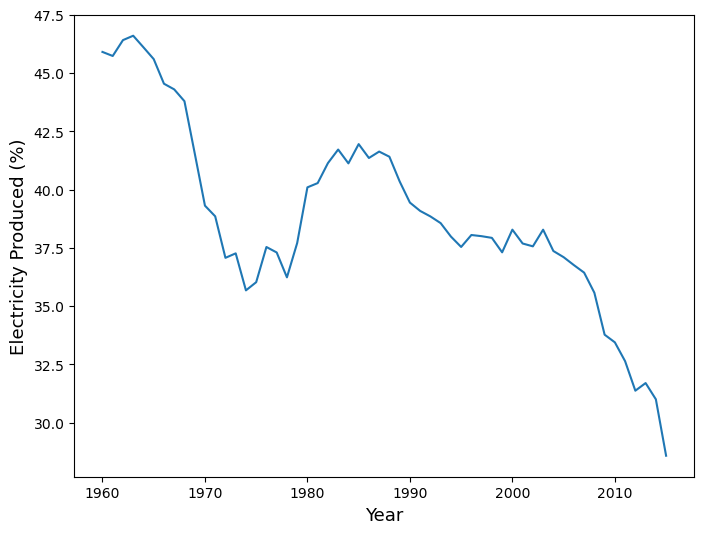

In [17]:
# part 2 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(coal['electricity_prod'])
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Electricity Produced (%)',fontsize=13)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13);

It appears that electricity produced decreases as the year increases, which suggests a negative correlation between the two. However, it is not constantly decreasing, nor are values in earlier years always higher that values in later years.

In [18]:
# part 3 
from statsmodels.tsa.stattools import adfuller

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(coal)

ADF Statistic: 1.872154432675823
p-value: 0.9984818799941668


In [19]:
# part 4
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

mod = pm.auto_arima(coal['electricity_prod'])

mod.summary()


/Users/gretchenwang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gretchenwang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/gretchenwang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gretchenwang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/gretchenwang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in r

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Mon, 01 May 2023   AIC                            149.368
Time:                        21:53:23   BIC                            155.390
Sample:                             0   HQIC                           151.697
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

the arima model with 1 AR term, 1 I term, and 1 MA term is the best fit 

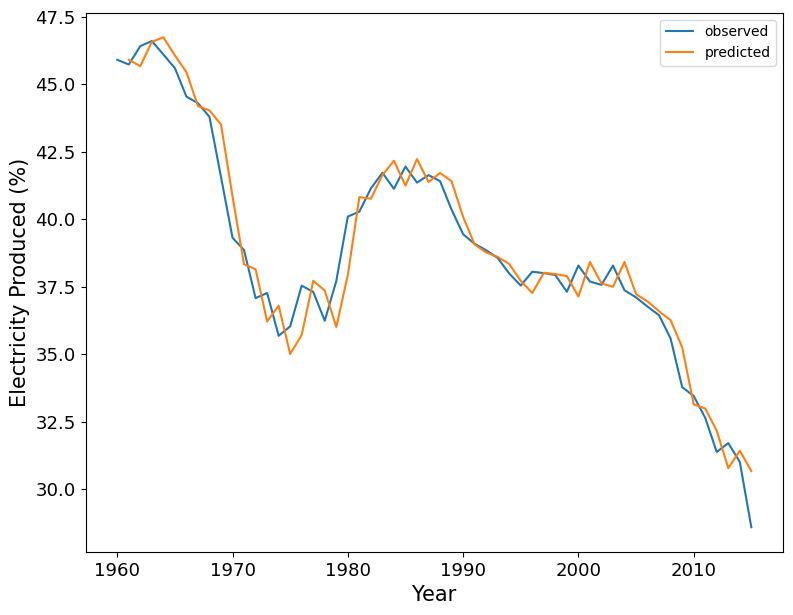

In [20]:
in_samp_pred = mod.predict_in_sample()
in_samp_pred = pd.Series(in_samp_pred, index=coal.index)

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(coal, label='observed')
ax.plot(coal.index[1:], in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Electricity Produced (%)', fontsize=15) 
ax.legend();

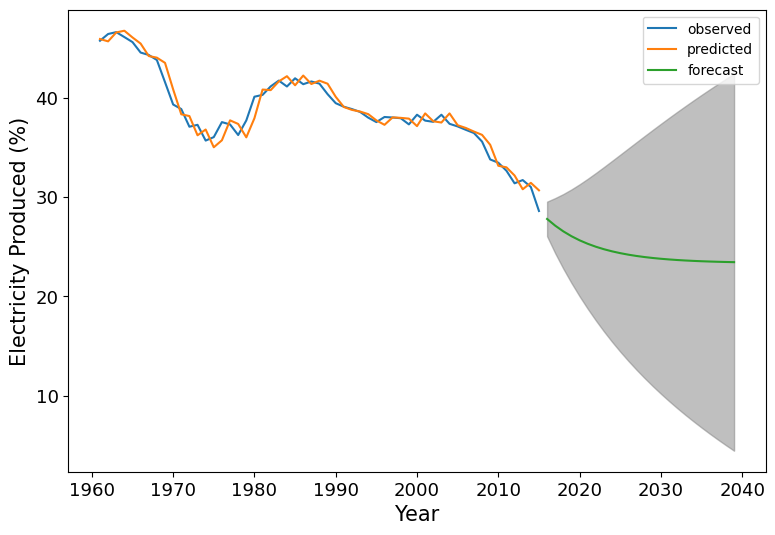

In [21]:
# part 6
forecast, ci = mod.predict(24, return_conf_int=True)
future_dates = pd.date_range(coal.index[-1], periods=25, freq='AS-JAN',inclusive='neither')

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(coal[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(future_dates,forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) 
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Electricity Produced (%)', fontsize=15)
ax.legend();